# Hierarchical Clustering

**Important Parameters**

**Relevant Information**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

## Implementation

Let's work with Iris Dataset

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

### Data

In [2]:
#Load the dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Normalization 
for d in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    df[d] = (df[d] - df[d].min()) / (df[d].max() - df[d].min())
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


### Dendogram

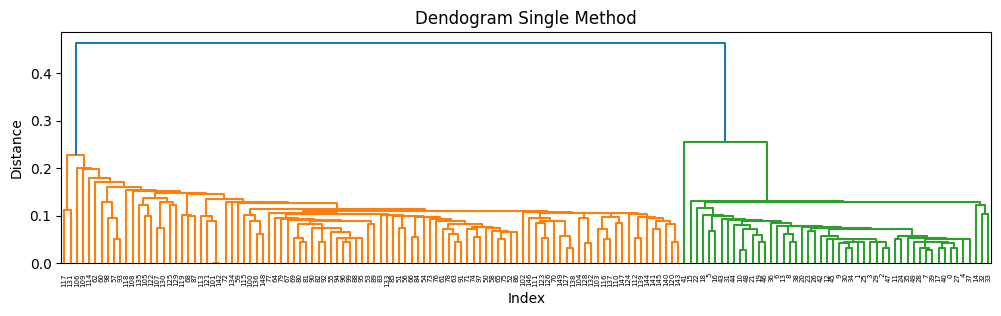

In [4]:
dist_sin = linkage(df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]], method="single")
plt.figure(figsize=(12,3))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendogram Single Method") 
plt.show()

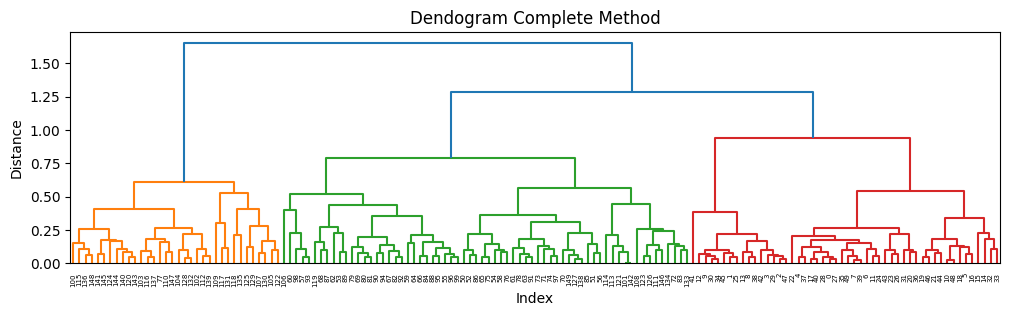

In [5]:
dist_comp = linkage(df.loc[: , ["sepal_length","sepal_width","petal_length","petal_width"]] , method="complete")

plt.figure(figsize=(12,3))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendogram Complete Method") 
plt.show()

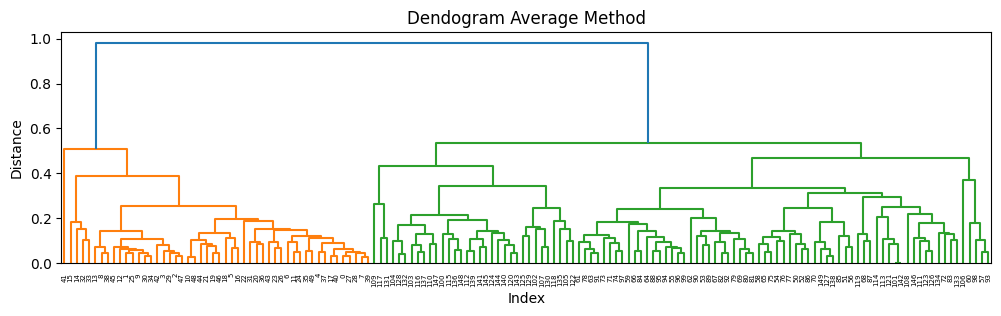

In [6]:
dist_sin = linkage(df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]], method="average")
plt.figure(figsize=(12,3))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendogram Average Method") 
plt.show()

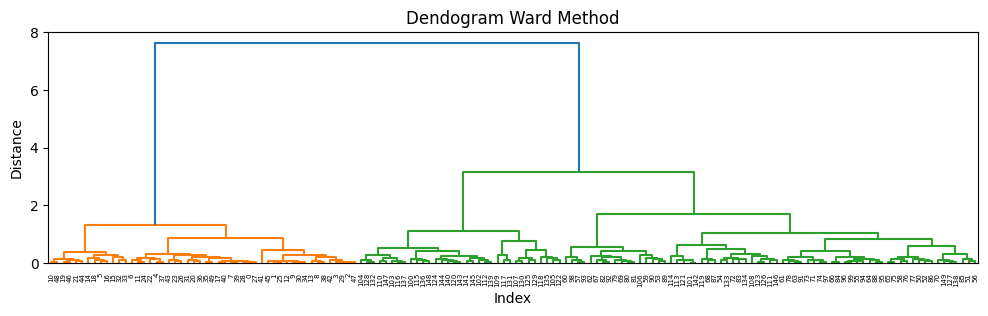

In [7]:
dist_comp = linkage(df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]],method="ward")

plt.figure(figsize=(12,3))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title("Dendogram Ward Method") 
plt.show()

### Clustering Ward 4 Variables

In [19]:
clustering = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage='ward')
clustering.fit(df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]])
df["clustering_labels_2"] = clustering.labels_ 

clustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage='ward')
clustering.fit(df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]])
df["clustering_labels_3"] = clustering.labels_ 
df

,sepal_length,sepal_width,petal_length,petal_width,target,clustering_labels_2,clustering_labels_3
0,0.222222,0.625000,0.067797,0.041667,0,1,1
1,0.166667,0.416667,0.067797,0.041667,0,1,1
2,0.111111,0.500000,0.050847,0.041667,0,1,1
3,0.083333,0.458333,0.084746,0.041667,0,1,1
4,0.194444,0.666667,0.067797,0.041667,0,1,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,2
146,0.555556,0.208333,0.677966,0.750000,2,0,0
147,0.611111,0.416667,0.711864,0.791667,2,0,2
148,0.527778,0.583333,0.745763,0.916667,2,0,2


<Axes: title={'center': 'Target'}, xlabel='sepal_length', ylabel='petal_width'>

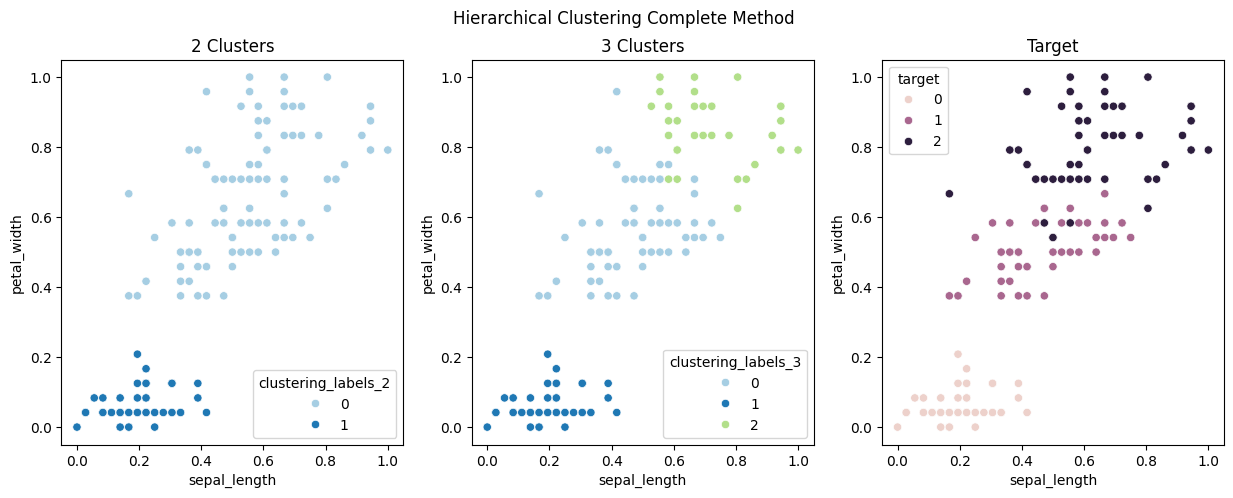

In [20]:
plt.figure(figsize=(15,5))

plt.suptitle("Hierarchical Clustering Complete Method")

plt.subplot(1,3,1)
plt.title("2 Clusters")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="clustering_labels_2", palette="Paired")

plt.subplot(1,3,2)
plt.title("3 Clusters")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="clustering_labels_3", palette="Paired")

plt.subplot(1,3,3)
plt.title("Target")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="target")

### Clustering Average 2 Variables

In [21]:
clustering = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage='average')
clustering.fit(df.loc[:,["sepal_length", "petal_width"]])
df["clustering_labels_2"] = clustering.labels_ 

clustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage='average')
clustering.fit(df.loc[:,["sepal_length", "petal_width"]])
df["clustering_labels_3"] = clustering.labels_ 
df

,sepal_length,sepal_width,petal_length,petal_width,target,clustering_labels_2,clustering_labels_3
0,0.222222,0.625000,0.067797,0.041667,0,1,1
1,0.166667,0.416667,0.067797,0.041667,0,1,1
2,0.111111,0.500000,0.050847,0.041667,0,1,1
3,0.083333,0.458333,0.084746,0.041667,0,1,1
4,0.194444,0.666667,0.067797,0.041667,0,1,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,0
146,0.555556,0.208333,0.677966,0.750000,2,0,2
147,0.611111,0.416667,0.711864,0.791667,2,0,0
148,0.527778,0.583333,0.745763,0.916667,2,0,0


<Axes: title={'center': 'Target'}, xlabel='sepal_length', ylabel='petal_width'>

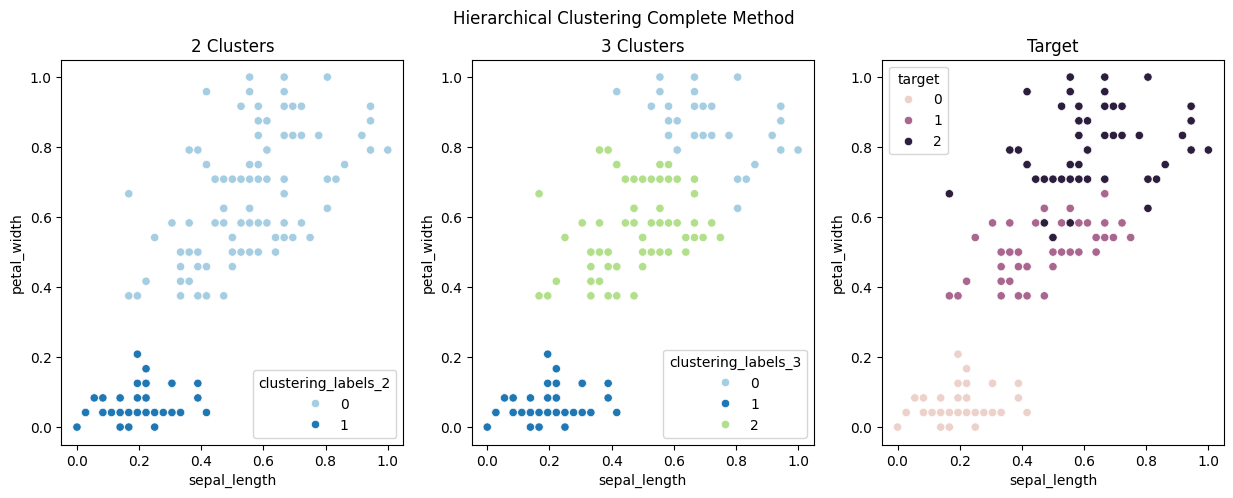

In [22]:
plt.figure(figsize=(15,5))

plt.suptitle("Hierarchical Clustering Complete Method")

plt.subplot(1,3,1)
plt.title("2 Clusters")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="clustering_labels_2", palette="Paired")

plt.subplot(1,3,2)
plt.title("3 Clusters")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="clustering_labels_3", palette="Paired")

plt.subplot(1,3,3)
plt.title("Target")
sns.scatterplot(x="sepal_length",y="petal_width", data=df, hue="target")